/tmp/ipykernel_62406/800248443.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  return (mu_prime * (m + p)) / ((m + mu_prime * q) * mu_prime * b * d_prime * np.sin(alpha)) * F


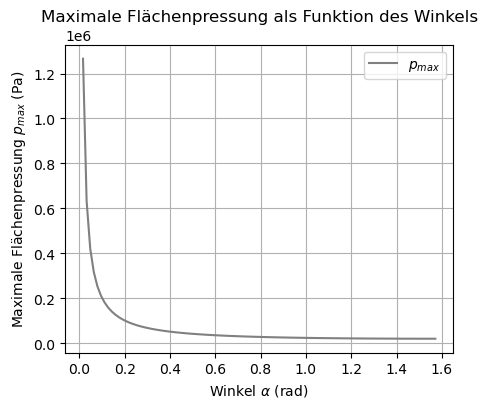

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Definiert die Funktion für p_max basierend auf der gegebenen Formel
def calculate_p_max(mu_prime, m, p, q, b, d_prime, alpha, F):
    # Berechnet p_max unter Berücksichtigung verschiedener Parameter
    return (mu_prime * (m + p)) / ((m + mu_prime * q) * mu_prime * b * d_prime * np.sin(alpha)) * F


# Erstellt einen Bereich von Werten für alpha von 0 bis π/2
alpha_values = np.linspace(0, np.pi/2, 100)

# Berechnet p_max für jeden alpha-Wert
p_max_values = [calculate_p_max(mu_prime_value, m_value, p_value, q_value, b_value, d_prime_value, alpha, F_value) for alpha in alpha_values]

# Plottet die berechneten Werte
plt.figure(figsize=(5, 4))
plt.plot(alpha_values, p_max_values, label=r'$p_{max}$', color='gray')
plt.xlabel(r'Winkel $\alpha$ (rad)')  # Beschriftung der x-Achse
plt.ylabel(r'Maximale Flächenpressung $p_{max}$ (Pa)')  # Beschriftung der y-Achse
plt.title('Maximale Flächenpressung als Funktion des Winkels')  # Titel des Plots
plt.legend()  # Legende anzeigen
plt.grid(True)  # Raster anzeigen
plot_filename = 'Flaechenpressung_Plot.png'
plt.savefig(plot_filename)
plt.show()  # Plot anzeigen


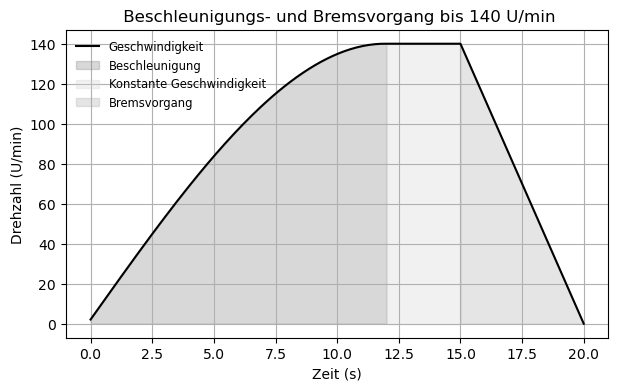

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Zeitwerte für die Beschleunigung von 0 bis 12 Sekunden in kleinen Schritten
time_acceleration = np.linspace(0, 12, 100)
# Quadratische Beschleunigungsfunktion
acceleration = - (160 / (12**2)) * (time_acceleration**2) + 160
# Drehzahlwerte durch Integration der Beschleunigung
speed_acceleration = np.cumsum(acceleration) * (12 / 100)

# Maximale Geschwindigkeit auf 140 U/min anpassen
max_speed_desired = 140
max_speed_original = speed_acceleration[-1]
speed_factor = max_speed_desired / max_speed_original
speed_acceleration_adjusted = speed_acceleration * speed_factor

# Zeitwerte für die konstante Phase (12 bis 15 Sekunden)
time_constant = np.linspace(12, 15, 30)
# Konstante Geschwindigkeit (angepasster letzter Wert der Beschleunigungsphase)
speed_constant_adjusted = np.full_like(time_constant, speed_acceleration_adjusted[-1])

# Zeitwerte für den Bremsvorgang (15 bis 20 Sekunden)
time_deceleration = np.linspace(15, 20, 50)
# Lineare Bremsfunktion (Annahme für das Beispiel)
speed_deceleration_adjusted = np.linspace(speed_constant_adjusted[-1], 0, 50)

# Kombinierte Zeit- und Geschwindigkeitswerte für den Gesamtverlauf
time_total = np.concatenate([time_acceleration, time_constant, time_deceleration])
speed_total_adjusted = np.concatenate([speed_acceleration_adjusted, speed_constant_adjusted, speed_deceleration_adjusted])

# Diagramm mit Graustufen erstellen
plt.figure(figsize=(7, 4))  # Reduzierung der Höhe des Plots
plt.plot(time_total, speed_total_adjusted, label='Geschwindigkeit', color='black')
plt.fill_between(time_acceleration, 0, speed_acceleration_adjusted, color='grey', alpha=0.3, label='Beschleunigung')
plt.fill_between(time_constant, 0, speed_constant_adjusted, color='lightgrey', alpha=0.3, label='Konstante Geschwindigkeit')
plt.fill_between(time_deceleration, 0, speed_deceleration_adjusted, color='darkgrey', alpha=0.3, label='Bremsvorgang')

# Achsenbeschriftungen und Titel
plt.xlabel('Zeit (s)')
plt.ylabel('Drehzahl (U/min)')
plt.title(' Beschleunigungs- und Bremsvorgang bis 140 U/min')
plt.grid(True)
plt.legend(fontsize='small', frameon=False, loc='upper left')
plt.savefig('Beschleunigungs- und Bremsvorgang bis 140Umin.png')
# Diagramm anzeigen
plt.show()


In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Zeitwerte für die Beschleunigung von 0 bis 12 Sekunden
time_acceleration = np.linspace(0, 12, 100)
# Quadratische Beschleunigungsfunktion
acceleration = - (160 / (12**2)) * (time_acceleration**2) + 160
# Drehzahlwerte durch Integration der Beschleunigung
speed_acceleration = np.cumsum(acceleration) * (12 / 100)

# Maximale Geschwindigkeit auf 140 U/min anpassen
max_speed_desired = 140
max_speed_original = speed_acceleration[-1]
speed_factor = max_speed_desired / max_speed_original
speed_acceleration_adjusted = speed_acceleration * speed_factor

# Zeitwerte für die konstante Phase (12 bis 15 Sekunden)
time_constant = np.linspace(12, 15, 30)
# Konstante Geschwindigkeit (angepasster letzter Wert der Beschleunigungsphase)
speed_constant_adjusted = np.full_like(time_constant, speed_acceleration_adjusted[-1])

# Zeitwerte für den ersten Bremsvorgang (15 bis 20 Sekunden)
time_deceleration_1 = np.linspace(15, 20, 50)
# Linearer Bremsvorgang bis 60 U/min
speed_deceleration_1_adjusted = np.linspace(speed_constant_adjusted[-1], 60, 50)

# Zeitwerte für den quadratischen Anstieg (20 bis 30 Sekunden)
time_acceleration_2 = np.linspace(20, 30, 100)
# Quadratische Beschleunigungsfunktion für den zweiten Anstieg
acceleration_2 = (max_speed_desired - 60) / (10**2) * (time_acceleration_2 - 20)**2 + 60
speed_acceleration_2_adjusted = acceleration_2

# Zeitwerte für den zweiten Bremsvorgang (30 bis 35 Sekunden)
time_deceleration_2 = np.linspace(30, 35, 50)
# Linearer Bremsvorgang bis 0 U/min
speed_deceleration_2_adjusted = np.linspace(speed_acceleration_2_adjusted[-1], 0, 50)

# Kombinierte Zeit- und Geschwindigkeitswerte für den Gesamtverlauf
time_total = np.concatenate([time_acceleration, time_constant, time_deceleration_1, time_acceleration_2, time_deceleration_2])
speed_total_adjusted = np.concatenate([speed_acceleration_adjusted, speed_constant_adjusted, speed_deceleration_1_adjusted, speed_acceleration_2_adjusted, speed_deceleration_2_adjusted])

# Diagramm mit Graustufen erstellen
plt.figure(figsize=(7, 4))  # Anpassung der Plot-Größe
plt.plot(time_total, speed_total_adjusted, label='Geschwindigkeit', color='black')
plt.fill_between(time_acceleration, 0, speed_acceleration_adjusted, color='grey', alpha=0.3, label='Beschleunigung')
plt.fill_between(time_constant, 0, speed_constant_adjusted, color='lightgrey', alpha=0.3, label='Konstante Geschwindigkeit')
plt.fill_between(time_deceleration_1, 0, speed_deceleration_1_adjusted, color='darkgrey', alpha=0.3, label='1. Bremsvorgang')
plt.fill_between(time_acceleration_2, 0, speed_acceleration_2_adjusted, color='grey', alpha=0.3, label='2. Beschleunigung')
plt.fill_between(time_deceleration_2, 0, speed_deceleration_2_adjusted, color='darkgrey', alpha=0.3, label='2. Bremsvorgang')

# Achsenbeschriftungen und Titel
plt.xlabel('Zeit (s)')
plt.ylabel('Drehzahl (U/min)')
plt.title('Beschleunigungs- und Bremsvorgnge')
plt.grid(True)
plt.legend(fontsize='small', frameon=False, loc='upper left')
plt.savefig(' Beschleunigungs- und Bremsvorgangs')
# Diagramm anzeigen
plt.show()
